# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#overview)
* [Stage 2. Data preprocessing](#preprocessing)
    * [2.1 Plans](#plans)
    * [2.2 User](#user)
    * [2.3 Calls](#calls)
    * [2.4 Messages](#messages)
    * [2.5 Internet](#internet)
* [Stage 3. EDA](#eda)
    * [3.1 Aggregate data per user](#agg)
    * [3.2 Study user behaviour](#behaviour)
        * [3.2.1 Calls](#b_calls)
        * [3.2.2 Messages](#b_messages)
        * [3.2.3 Internet](#b_internet)
        * [3.2.4 Revenue](#revenue)
* [Stage 4. Hypotheses testing](#hypo)
     * [4.1 Hypothesis 1:The average revenue from users of Ultimate and Surf calling plans differs.](#hypo1)
     * [4.2 Hypothesis 2:The average revenue from users in the NY-NJ area is different from that of the users from the other regions.](#hypo2)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

**Which one is a better plan?**

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Stage 1. Data overview<a id='overview'></a>

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_message = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [4]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [5]:
df_message

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Stage 2. Data preprocessing <a id='preprocessing'></a>

### Plans<a id='plans'></a>

In [8]:
# Print the general/summary information about the plans' DataFrame

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Print a sample of data for plans

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Column Definition**

1. messages_included - **Standard no. of messages** given for this plan
2. mb_per_month_included - **Standard no. of Internet data** given for this plan (in Megabytes)
3. minutes_included - **Standard no. of call minutes** given for this plan
4. usd_monthly_pay - Monthly fees for this plan
5. usd_per_gb - Extra payment for **exceeding usage of Internet data** (in Gigabytes)
6. usd_per_message - Extra payment for **exceeding number of messages**
7. usd_per_minute - Extra payment for **exceeding number of call minutes**
8. plan_name - The name of the plan

**Observation**

I will change the column name of 'usd_monthly_pay' to 'usd_monthly_fee' so it is not confusing and 'plan_name' to 'plan' to match with other dataframe.

In [10]:
# Renaming column

df_plans.rename(columns = {'usd_monthly_pay' : 'usd_monthly_fee', 'plan_name' : 'plan'}, inplace = True)

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users<a id='users'></a>

In [12]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Print a sample of data for users

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Column Definition**

1. user_id - User's unique id
2. first_name - User's first name
3. last_name - User's last name
4. age - User's age
5. city - User's city of residence
6. reg_date - User's register date (dd,mm,yy)
7. plan - User's plan name
8. churn_date - User's date of termination of plan


**Observation**

There is a lot of missing value in 'churn_date' column because most of the customers have not terminate their plans yet but does not need any fixing. On the other hand, there's dates in both 'reg_date' and 'churn_date' and their type are in strings. To fix, I will change the type to datetime.

In [14]:
# Change date columns to datetime

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])


In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Calls<a id='calls'></a>

In [17]:
# Print the general/summary information about the calls' DataFrame

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Print a sample of data for calls

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Column Definition**


1. id - A unique id for every calls a user made.
2. user_id - A user's unique id
3. call_date - The date the call is made
4. duration - The duration of the call (in minutes)


**Observation**

No missing values. The 'call_date' data type is in strings. I will change the type to datetime.


In [19]:
# Change date columns to datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [20]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Messages<a id='messages'></a>

In [22]:
# Print the general/summary information about the messages' DataFrame

df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Print a sample of data for messages

df_message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Column Definition**

1. id - A unique id for every message user made.
2. user_id - User's unique id
3. message_date - The date the message is made

**Observation**

No missing values. The 'message_date' data type is in strings. I will change the type to datetime.

In [24]:
# Change date columns to datetime

df_message['message_date'] = pd.to_datetime(df_message['message_date'])

In [25]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Internet<a id='internet'></a>

In [27]:
# Print the general/summary information about the internet DataFrame

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Print a sample of data for the internet traffic

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Column Definition**

1. id - A unique id for every session user use data.
2. user_id - User's unique id
3. session_date - The date the session is use
4. mb_used - How many MB used in that session.

**Observation**

No missing values. The 'session_date' data type is in strings. I will change the type to datetime.

In [29]:
# Change date columns to datetime

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [30]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Stage 3. EDA<a id='eda'></a>

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [32]:
# Print out the plan conditions and make sure they are clear for you

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Aggregate data per user<a id='agg'></a>

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [33]:
# Calculate the number of calls made by each user per month. Save the result.

df_calls['month'] = df_calls['call_date'].dt.month
df_calls['rounded_duration'] = df_calls['duration'].apply(math.ceil)
df_calls

,id,user_id,call_date,duration,month,rounded_duration
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9
137731,1499_200,1499,2018-10-20,10.89,10,11
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,10,1


In [34]:
# Calculate the amount of minutes spent by each user per month. Save the result.

agg_calls = df_calls.groupby(['user_id', 'month']).agg({'id':'nunique', 'rounded_duration':'sum'}).reset_index()
agg_calls.columns = ['user_id','month', 'total_calls', 'call_duration']
agg_calls

,user_id,month,total_calls,call_duration
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [35]:
# Calculate the number of messages sent by each user per month. Save the result.

df_message['month'] = df_message['message_date'].dt.month
agg_message = df_message.groupby(['user_id', 'month']).agg({'id':'nunique'}).reset_index()
agg_message.columns = ['user_id', 'month', 'total_message']
agg_message

,user_id,month,total_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [36]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_internet['month'] = df_internet['session_date'].dt.month
agg_internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
agg_internet.columns = ['user_id', 'month','total_mb']
agg_internet

,user_id,month,total_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [37]:
# Convert total MB to total GB (round up)

agg_internet ['total_gb'] = (agg_internet ['total_mb']/1024).apply(math.ceil)
agg_internet

,user_id,month,total_mb,total_gb
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


Let's put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [38]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

merge1 = pd.merge(agg_calls, agg_message, on= ['user_id', 'month'], how='outer')
merge2 = pd.merge(merge1, agg_internet, on= ['user_id', 'month'], how='outer')
merge2

,user_id,month,total_calls,call_duration,total_message,total_mb,total_gb
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


Merge merge2 and df_user to get user's plan and city.

In [39]:
# Add the plan information

df_agg = pd.merge(merge2, df_users[['user_id','plan', 'city']], on ='user_id', how='left')
df_agg

,user_id,month,total_calls,call_duration,total_message,total_mb,total_gb,plan,city
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,NaN,NaN,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA"
2290,1482,10,NaN,NaN,2.0,NaN,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,NaN,NaN,NaN,233.17,1.0,ultimate,"Salt Lake City, UT MSA"


To calculate monthly revenue:

**Step 1:** Merge df_agg with df_plans to get the rates according to each plan.

**Step 2:** Write a function to calculate the differences and fees, save all into a new dataframe.

**Step 3:** Merge the difference dataframe to the dataframe created in Step 1.

**Step 4:** Write a function to calculate the total fees for each user


In [40]:
# Merge df_agg to df_plans

df_complete = df_agg.merge(df_plans, on ='plan', how='left')
df_complete

,user_id,month,total_calls,call_duration,total_message,total_mb,total_gb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03
2289,1361,5,NaN,NaN,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA",50,15360,500,20,10,0.03,0.03
2290,1482,10,NaN,NaN,2.0,NaN,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01
2291,1108,12,NaN,NaN,NaN,233.17,1.0,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,70,7,0.01,0.01


In [41]:
# Replacing all nan values to 0

df_complete.fillna(0, inplace= True)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   total_calls            2293 non-null   float64
 3   call_duration          2293 non-null   float64
 4   total_message          2293 non-null   float64
 5   total_mb               2293 non-null   float64
 6   total_gb               2293 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_fee        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

In [42]:
# Create a function to calculate the excess call, internet usage and messages
# Multiply to usd

def calculate_differences(df):
   
    df['excess_call'] = df['call_duration'] - df['minutes_included']
    df['excess_call'] = df['excess_call'].apply(lambda x: x if x > 0 else 0)
    df['excess_call_fee'] = df['excess_call']* df['usd_per_minute']
    
    df['excess_mb'] = df['total_mb'] - df['mb_per_month_included']
    df['excess_gb'] = (df['excess_mb'] / 1024).apply(math.ceil)
    df['excess_gb'] = df['excess_gb'].apply(lambda x: x if x > 0 else 0)
    df['excess_gb_fees'] = df['excess_gb']* df['usd_per_gb']
    
    df['excess_message'] = df['total_message'] - df['messages_included']
    df['excess_message'] = df['excess_message'].apply(lambda x: x if x > 0 else 0)
    df['excess_message_fees'] = df['excess_message']* df['usd_per_message']
    
    return df[['user_id','month', 'plan', 'excess_call', 'excess_message', 'excess_gb', 'excess_call_fee', 'excess_gb_fees', 'excess_message_fees']]

In [43]:
# Calculate differences and print

calculate_differences(df_complete)
df_complete

,user_id,month,total_calls,call_duration,total_message,total_mb,total_gb,plan,city,messages_included,...,usd_per_gb,usd_per_message,usd_per_minute,excess_call,excess_call_fee,excess_mb,excess_gb,excess_gb_fees,excess_message,excess_message_fees
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,7,0.01,0.01,0.0,0.0,-28818.53,0,0,0.0,0.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,10,0.03,0.03,0.0,0.0,-8440.85,0,0,0.0,0.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,10,0.03,0.03,0.0,0.0,-2045.18,0,0,0.0,0.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,10,0.03,0.03,0.0,0.0,6970.49,7,70,3.0,0.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,10,0.03,0.03,0.0,0.0,3144.30,4,40,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,10,0.03,0.03,0.0,0.0,-2320.09,0,0,11.0,0.33
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA",50,...,10,0.03,0.03,0.0,0.0,-13840.31,0,0,0.0,0.00
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,...,7,0.01,0.01,0.0,0.0,-30720.00,0,0,0.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA",1000,...,7,0.01,0.01,0.0,0.0,-30486.83,0,0,0.0,0.00


In [44]:
# Create a function to calculate total revenue

def calculate_user_revenue(df):
    df['total_revenue'] = df['usd_monthly_fee']+ df['excess_call_fee']+ df['excess_gb_fees']+ df['excess_message_fees']
    return df['total_revenue']

In [45]:
# Calculate the monthly revenue for each user

df_complete['total_revenue'] = calculate_user_revenue(df_complete)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   total_calls            2293 non-null   float64
 3   call_duration          2293 non-null   float64
 4   total_message          2293 non-null   float64
 5   total_mb               2293 non-null   float64
 6   total_gb               2293 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_fee        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

In [46]:
df_complete

,user_id,month,total_calls,call_duration,total_message,total_mb,total_gb,plan,city,messages_included,...,usd_per_message,usd_per_minute,excess_call,excess_call_fee,excess_mb,excess_gb,excess_gb_fees,excess_message,excess_message_fees,total_revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,0.01,0.01,0.0,0.0,-28818.53,0,0,0.0,0.00,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,0.0,0.0,-8440.85,0,0,0.0,0.00,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,0.0,0.0,-2045.18,0,0,0.0,0.00,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,0.0,0.0,6970.49,7,70,3.0,0.09,90.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,0.0,0.0,3144.30,4,40,0.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,0.03,0.03,0.0,0.0,-2320.09,0,0,11.0,0.33,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA",50,...,0.03,0.03,0.0,0.0,-13840.31,0,0,0.0,0.00,20.00
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,...,0.01,0.01,0.0,0.0,-30720.00,0,0,0.0,0.00,70.00
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA",1000,...,0.01,0.01,0.0,0.0,-30486.83,0,0,0.0,0.00,70.00


### Study user behaviour<a id='behaviour'></a>

#### Calls<a id='b_calls'></a>

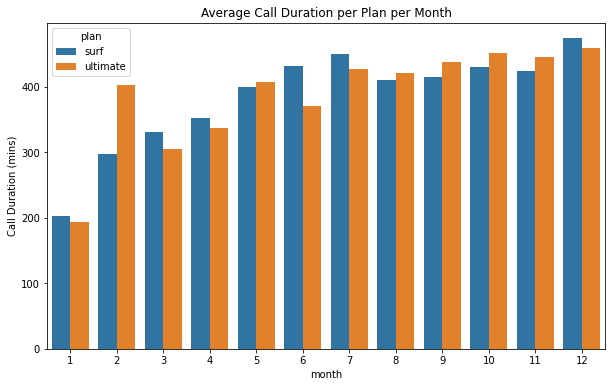

In [47]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

avg_call_duration = df_complete.groupby(['plan','month'])['call_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='call_duration', data = avg_call_duration, hue= 'plan' )

plt.title('Average Call Duration per Plan per Month')
plt.ylabel('Call Duration (mins)')
plt.show()

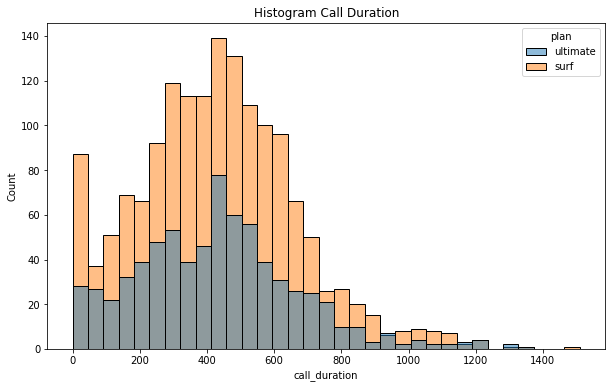

In [48]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(x='call_duration', data = df_complete, hue= 'plan')

plt.title('Histogram Call Duration')
plt.show()

In [49]:
# Calculate the mean and variance of the monthly call duration

stats_call = df_complete.groupby(['plan','month'])['call_duration'].agg(['mean' , 'var']).round(2).reset_index()
stats_call

,plan,month,mean,var
0,surf,1,203.00,15842.00
1,surf,2,297.00,52226.50
2,surf,3,330.00,35809.36
3,surf,4,351.54,50866.74
4,surf,5,399.58,59754.22
5,surf,6,431.30,45592.63
6,surf,7,449.98,61005.10
7,surf,8,410.11,54344.65
8,surf,9,414.23,46595.96
9,surf,10,429.73,52278.66


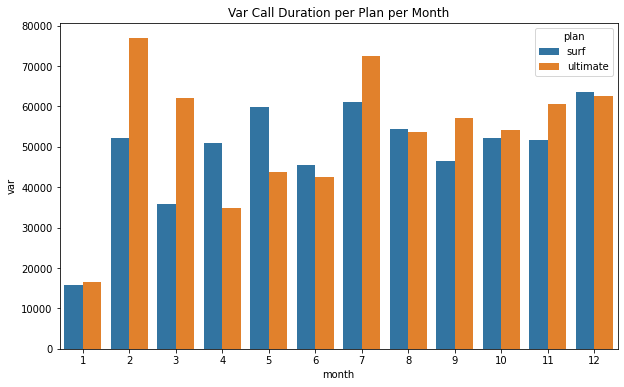

In [50]:
# Plot variance barplot for comparison

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='var', data = stats_call, hue= 'plan' )

plt.title('Var Call Duration per Plan per Month')
plt.show()

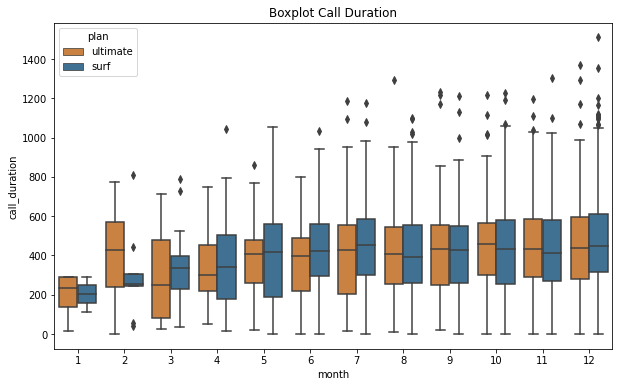

In [51]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10, 6))
plan_color = {"ultimate": "#e1812c", "surf": "#3274a1"}

sns.boxplot(x='month', y= 'call_duration', data = df_complete, hue= 'plan', palette = plan_color)
plt.title('Boxplot Call Duration')
plt.show()

**Observation:**

Given: Surf - 500 min ; Ultimate - 3000

**1. Average / Mean Call Barplot:** The overall average call duration for both plans are very similar and they are increasing at a similar rate as the months passes. It seems that users for both plans tend to make longer call as the month progresses. The users tend to make the most calls in December that exceed over 400 minutes of call duration.

**2. Histogram Call Graph:** The highest histogram count for every call duration is dominated by "Surf" plan. This means that the users of "Surf" plan make a lot of calls than users of "Ultimate" plan and their calls also varies in different lengths. Interestingly, there are many users in "Surf" plan who hardly make any calls. However, most calls for both plans lasted around 400 - 450 minutes as that is the highest point in the graph.

**3. Variance Call Barplot:** A high variance count shows that there is a huge difference between the original data and the mean, that means the data is inconsistent and volatile. It is understandable as there are users with 0 call durations to users with more than 1000 minutes in the data. From observation, both plans shows a high variance count, except in January. The variance count for both plans started spiking in February. The call duration of users of "Ultimate" plan is volatile as it spiked to its all time high in February and continues to show a higher variance count than the "Surf" plan in March and July as well. Although there are times when the call duration of "Surf" plan has a higher variance than the "Ultimate" plan, the overall graph shows a more consistant variance count after the initial spike in February. However, their variance count is still high and almost similar to "Ultimate" plan.

**4. Boxplot Call Graph:** Both plans are given a certain amount of call minutes - Surf = 500 mins ; Unlimited = 3000 mins.  For the first few months, the boxplot of "Ultimate" plan's body is bigger than "Surf" plan, indicating a variety of call durations. Starting from the forth month, the body of the "Surf" plan is larger, maximum call duration increase and their outliners increase as well. The highest call minutes for users of "Surf" plan is in December with a high maximun count and an outliner plotted at the highest point in the graph, higher than "Ultimate" plan. 

**Conclusion:**

The users of both plans have long call durations that are increasing every month. The users of "Surf" plan make the most number of calls compared to the users of "Unlimited" plan (as shown in Histogram) and they also make the longest call duration (as shown in boxplot). Both datasets of call duration of each plan is equally volatile. Users of "Surf" plans frequently exceed the given call duration while users of "Ultimate" plan did not exceed the given call duration at all.

#### Messages<a id='b_messages'></a>

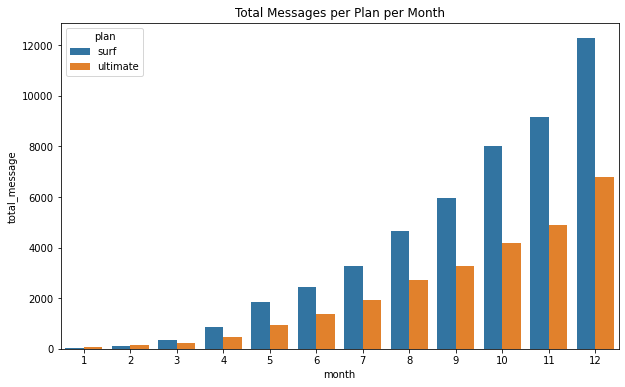

In [52]:
# Compare the number of messages users of each plan tend to send each month

monthly_total_messages = df_complete.groupby(['plan','month'])['total_message'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_message', data = monthly_total_messages, hue= 'plan' )

plt.title('Total Messages per Plan per Month')
plt.show()

In [53]:
# Calculate the mean and the variance of the monthly messages

stats_messages = df_complete.groupby(['plan', 'month'])['total_message'].agg(['mean', 'var']).round(2).reset_index()
stats_messages

,plan,month,mean,var
0,surf,1,10.50,220.50
1,surf,2,12.00,386.00
2,surf,3,15.26,346.57
3,surf,4,17.40,501.59
4,surf,5,24.01,847.20
5,surf,6,25.30,914.92
6,surf,7,27.03,923.92
7,surf,8,28.78,1029.52
8,surf,9,30.76,1003.83
9,surf,10,33.84,1275.47


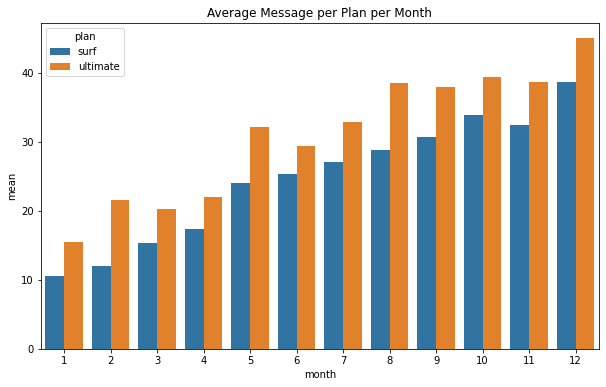

In [54]:
# Average messages sent per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='mean', data = stats_messages, hue= 'plan' )

plt.title('Average Message per Plan per Month')
plt.show()

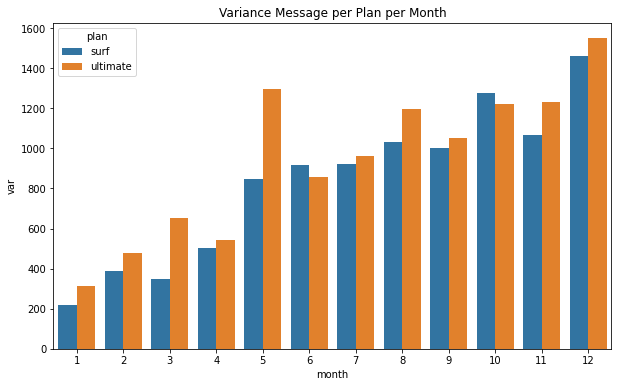

In [55]:
# Variance message per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='var', data = stats_messages, hue= 'plan' )

plt.title('Variance Message per Plan per Month')
plt.show()

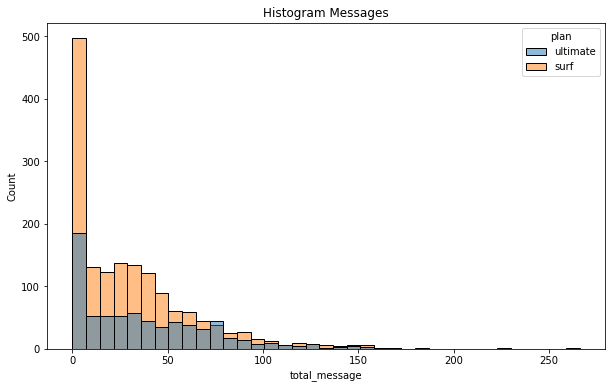

In [56]:
# Histogram Messages

plt.figure(figsize=(10, 6))
sns.histplot(x='total_message', data = df_complete, hue= 'plan')

plt.title('Histogram Messages')
plt.show()

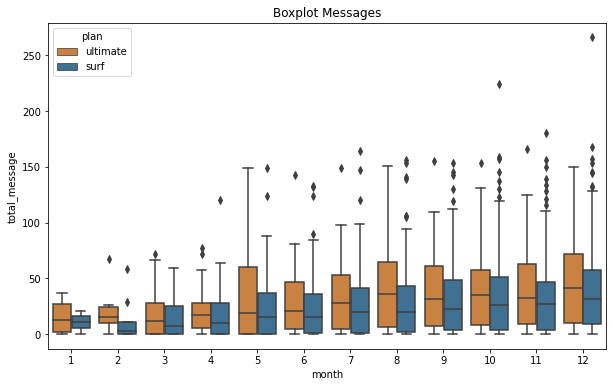

In [57]:
# Plot a boxplot to visualize the distribution of the monthly messages

plt.figure(figsize=(10, 6))

sns.boxplot(x='month', y= 'total_message', data = df_complete, hue= 'plan', palette = plan_color)
plt.title('Boxplot Messages')
plt.show()

**Observation:**

Given: Surf - 50 ; Ultimate - 1000

**1. Total Message Barplot:** The barplot shows a steady increase of total messages for users of both plans as the month progresses. The users of "Surf" plan has a higher message usage that is almost double compared to users of "Ultimate" plan. 

**2. Average Message Barplot:** The average barplot shows a steady increase as well and peaked in December for both plans. Contrast to the Total Message Barplot, the Average Barplot shows the "Ultimate" plan has a higher average message than the "Surf" plan. This could mean that not all users of the "Surf" plan sent the same number of messages monthly and only a small number of users sent a lot of messages while many users only send a few or did not send messages at all. Contrary, most users of the "Ultimate" plan sent almost the same number of messages every month. Hence, their average messages are higher than "Surf" plan.

**3. Variance Message Barplot:** The variance barplot is also increasing each month for both plans. This only means the data is getting more and more inconsistant. In May, the variance count of "Ultimate" plan is very high compared to "Surf" plan. Both plans reach an all time high in variance in the month of December.

**4. Histogram Graph:** The histogram shows the first bar peaking at its highest that all the bars in the graph. It seems that both plans has a lot of users who hardly send any messages especially the "Surf" plan. It seems that users of the "Surf" plan did not prefer sending message compared to calling. The "Surf" plan's overall histogram count is also higher then the "Ultimate" plan regardless of the number of messages sent.

**5. Boxplot Graph:** The minimum value of the boxplots are around zero for both plans every month. That means every month, there are a number of users who do not sent messages. Looking at the outliners in the graph, the outliners of "Surf" plans tend to increase as the month progresses. It seems that there is a small amount of "Surf" plan users like to send a lot of messages and that number of users, although small, but they are increasing. In the other hand, the tail and maximum value of "Ultimate" plan are particularly long especially in May, August and December however they do not have outliners. This means that the majority of users in "Ultimate" plan increase their total of message sent and there is no odd user who sent a huge amount of messages. 

**Conclusion:**

The users of both plans also sends a lot of messages that it is increasing every month. The users of "Ultimate" plan sends more messages than the users of "Surf" plans. Although there is also a large number of users who sends littl to no messages at all for both plans that result in a high variance count, the boxplot shows that users of "Ultimate" plan uses messages in a more uniform manner, meaning when the average increase, it means there are many users who increase their number of messages sent as well. Hence, resulting in a lesser outliner and a larger body and maximum count. Therefore, the message dataset of "Ultimate" plan is more stable than "Surf" plan. There are a number of users of "Surf" plans who frequently exceed the given message amount while users of "Ultimate" plan did not exceed the given message amount at all.

#### Internet<a id='b_internet'></a>

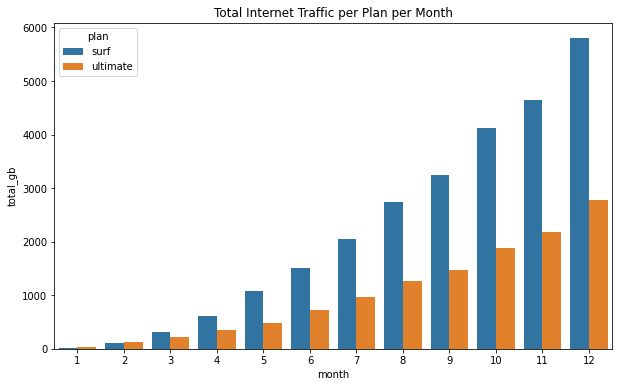

In [58]:
# Compare the amount of internet traffic consumed by users per plan

monthly_total_internet = df_complete.groupby(['plan','month'])['total_gb'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_gb', data = monthly_total_internet, hue= 'plan' )

plt.title('Total Internet Traffic per Plan per Month')
plt.show()

In [59]:
# Calculate the mean and the variance of the monthly internet traffic

stats_internet = df_complete.groupby(['plan', 'month'])['total_gb'].agg(['mean', 'var']).round(2).reset_index()
stats_internet

,plan,month,mean,var
0,surf,1,5.00,18.00
1,surf,2,12.22,41.44
2,surf,3,13.57,63.98
3,surf,4,12.22,56.22
4,surf,5,14.12,58.18
5,surf,6,15.48,47.75
6,surf,7,16.88,61.48
7,surf,8,16.88,71.42
8,surf,9,16.69,49.24
9,surf,10,17.41,60.73


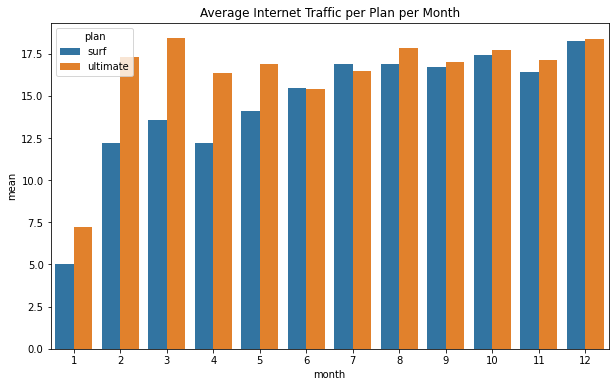

In [60]:
# Average Internet Traffic per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='mean', data = stats_internet, hue= 'plan' )

plt.title('Average Internet Traffic per Plan per Month')
plt.show()

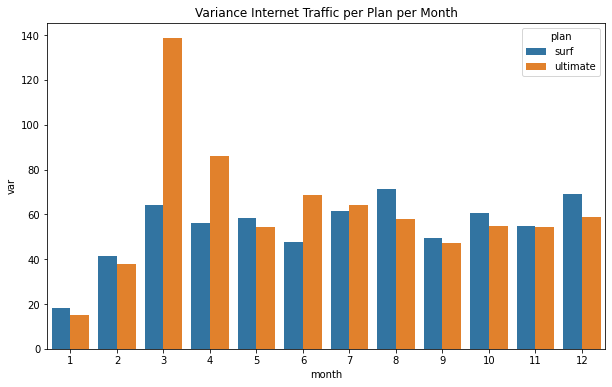

In [61]:
# Variance Internet Traffic per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='var', data = stats_internet, hue= 'plan' )

plt.title('Variance Internet Traffic per Plan per Month')
plt.show()

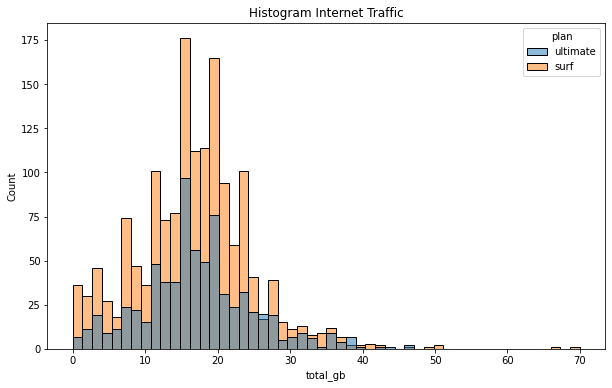

In [62]:
# Histogram Internet Traffic

plt.figure(figsize=(10, 6))
sns.histplot(x='total_gb', data = df_complete, hue= 'plan')

plt.title('Histogram Internet Traffic')
plt.show()

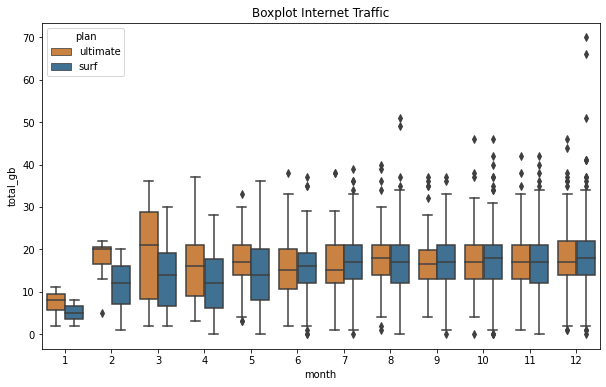

In [63]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic

plt.figure(figsize=(10, 6))

sns.boxplot(x='month', y= 'total_gb', data = df_complete, hue= 'plan', palette = plan_color)
plt.title('Boxplot Internet Traffic')
plt.show()

**Observation:**

Given : Surf - 15 GB ; Ultimate - 30 GB

**1. Total Internet Barplot:** The barplot shows a steady increase for both plans as the month progresses. Overall, the users of "Surf" plan seems to be using more Internet traffic compare to the users of "Ultimate" plan. 

**2. Average Internet Barplot:** The average usage of internet is low in January but it quickly spiked very high starting from February onwards for both plans. Initially, the "Ultimate" plan has a higher internet traffic from February to May. However, starting June, the average of "Surf" plans starts getting closer the "Ultimate" plan and they are increasing at a similar pace as the month progresses. Finally, both plans reach a high average in December with "Ultimate" plan's average still higher than "Surf" plan, but there is only a small difference between the two average.

**3. Variance Internet Barplot:** The "Ultimate" plan peaked in March according to the variance barplot. This means in March, there is probably a wide range Internet traffic recorded that is too high and too low that cause the data to be volatile and inconsistent. Overall, the "Surf" plan's variance graph shows a steady increase in the first 3 months, then it maintain a consistant graph between 60 - 70 variance count with occational small ups and downs. As for the "Ultimate" plan, after the highest peak in March, the variance drop every month and after September, it became consistant and even lower than variance count to "Surf" plan with only a small difference. This shows a consistant usage of internet traffic for both plans starting from the second half of the year.

**4. Histogram Graph:** The histogram graph shows that most users for both plans tend to use internet traffic at approximately 15 GB to 20 GB especially the users of "Surf" plan. In fact, like the previous 2 histogram graphs, the overall histogram count of "Surf" plan is higher than the "Ultimate" plan.

**5. Boxplot Graph:** The minimum value of internet traffic of "Ultimate" plan is higher most of the months. The majority users of "Ultimate" plan probably use more internet traffic than the "Surf" plan. However, in terms of highest usage of internet traffic, the "Surf" plan boxplot shows more outliners starting from the second half of the year, with the highest in December showing a few outliners at 70 GB.

**Conclusion:**

The users of "Ultimate" plan shows higher internet usage than users of "Surf" plan. Although in March, the data of "Ultimate" plan shows a high volatile dataset, it quickly stabalise down. Looking at the boxplots, the users of "Ultimate" plan is more stable and consistant with fewer outliners. Even with outliners, the value is closer to the dataset. Unlike the "Surf" plan, their outliners are further away from the data set and this can cause the dataset to be volatile. Both plans seems to have users who frequently exceed the given internet amount.

#### Revenue<a id='revenue'></a>

In [64]:
# Check total user & revenue per plan per month

overall_total_revenue = df_complete.groupby(['plan', 'month']).agg({'user_id': 'nunique', 'total_revenue': 'sum'}).reset_index()
overall_total_revenue

,plan,month,user_id,total_revenue
0,surf,1,2,40.00
1,surf,2,9,309.57
2,surf,3,23,1056.65
3,surf,4,50,2035.53
4,surf,5,77,3667.37
5,surf,6,97,4779.80
6,surf,7,121,7583.56
7,surf,8,162,10356.85
8,surf,9,194,11304.67
9,surf,10,237,15504.83


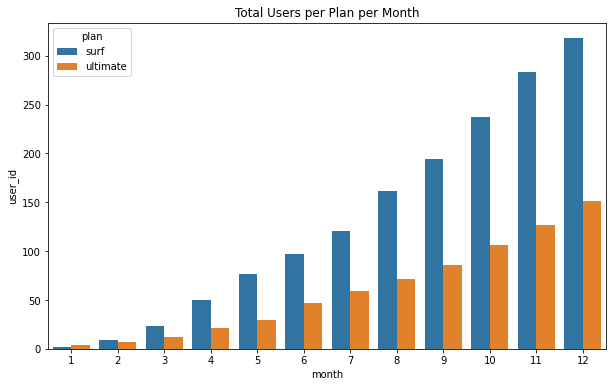

In [65]:
# Plot barplot for number of users

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='user_id', data = overall_total_revenue, hue= 'plan' )

plt.title('Total Users per Plan per Month')
plt.show()

In [66]:
# Calculate the mean and the variance of the monthly revenue

stats_revenue = df_complete.groupby(['plan', 'month'])['total_revenue'].agg(['mean', 'var']).round(2).reset_index()
stats_revenue

,plan,month,mean,var
0,surf,1,20.00,0.00
1,surf,2,34.40,428.28
2,surf,3,45.94,1512.02
3,surf,4,40.71,1198.96
4,surf,5,47.63,1967.54
5,surf,6,49.28,1988.91
6,surf,7,62.67,2943.39
7,surf,8,63.93,3587.49
8,surf,9,58.27,2260.64
9,surf,10,65.42,3198.24


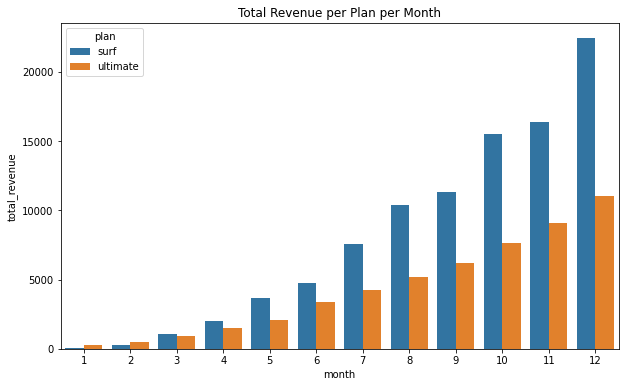

In [67]:
# Compare the total revenue for each plan to each month

sum_revenue = df_complete.groupby(['plan','month'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_revenue', data = sum_revenue, hue= 'plan' )

plt.title('Total Revenue per Plan per Month')
plt.show()

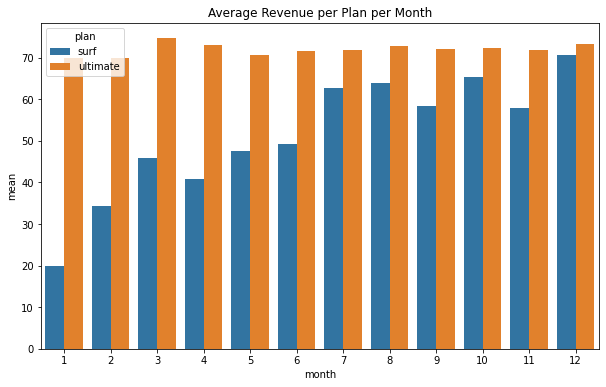

In [68]:
# Average revenue per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='mean', data = stats_revenue, hue= 'plan' )

plt.title('Average Revenue per Plan per Month')
plt.show()

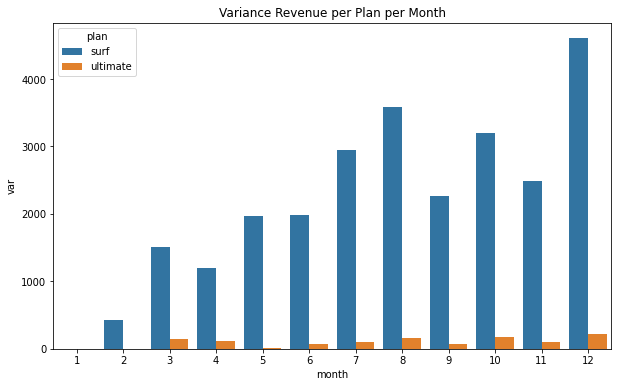

In [69]:
# Variance revenue per plan per month

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='var', data = stats_revenue, hue= 'plan' )

plt.title('Variance Revenue per Plan per Month')
plt.show()

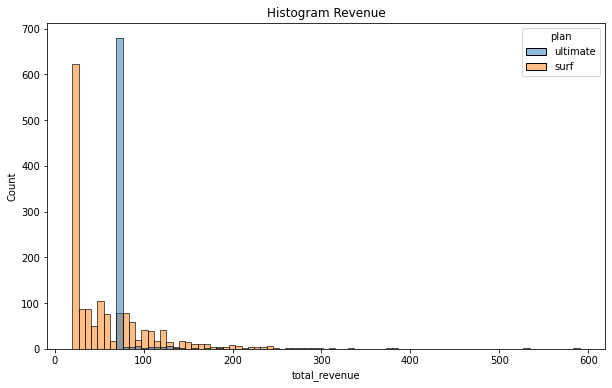

In [70]:
# Histogram Revenue

plt.figure(figsize=(10, 6))
sns.histplot(x='total_revenue', data = df_complete, hue= 'plan')

plt.title('Histogram Revenue')
plt.show()

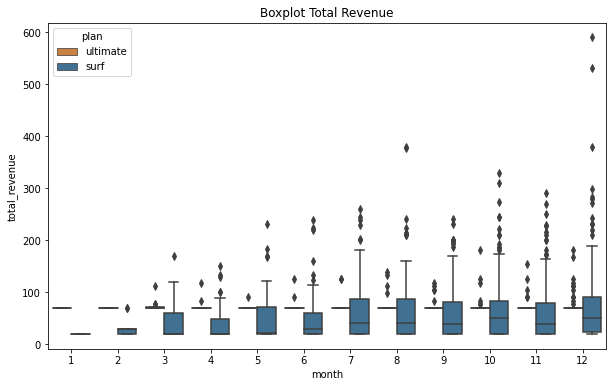

In [71]:
# Plot a boxplot to visualize the distribution of the monthly revenue

plt.figure(figsize=(10, 6))

sns.boxplot(x='month', y= 'total_revenue', data = df_complete, hue= 'plan', palette = plan_color)
plt.title('Boxplot Total Revenue')
plt.show()

**Observation:**

Fee : Surf - 20 ; Ultimate - 70

**1. Total Number of Users:** The number of users of "Surf" plan is double than the users of "Ultimate" plan. 

**2. Total Revenue per plan:** The total revenue of "Surf" plan is higher than "Ultimate" plan. Revenue of "Surf" plan also doubles in December as compared to "Ultimate" plan.

**3. Average Revenue:** The average revenue of "Ultimate" plan is still higher than the "Surf" plan although they have a small number of users. The average revenue of "Ultimate" plan is very high and consistant. However, the average revenue for "Surf" plan continues to increase. By December, the average revenue for "Surf" plan is almost the same as the average revenue of "Ultimate" plan with a little difference of amount between the two plans.

**4. Variance Revenue:** The variance count for "Surf" plan revenue is many times higher than "Ultimate" plan. This means that the users of "Surf" plan paid different amount of fees every month depending on their usage. This behaviour records a variety of amount in the data and it is very inconsistant. On the other hand, the "Ultimate" plan has a very low variance count throughout the year, some months are even closer to 0. This shows that the revenue of "Ultimate" plan is very stable and their users pay a very consistent amount in their fees every month.

**5. Histogram Graph:** The minimum amount for "Surf" plan is 20 USD and "Ultimate" plan is 70 USD. From the histogram, it seems that most users for both plans paid their minimum amount. However, there are also a lot of users of "Surf" plan paid more than 20 USD. At different price point that exceed the minimum fee of each plan, the number of users from "Surf" plan are always higher than the users of "Ultimate" plan. This means that there are plenty of users in "Surf" plan who are heavy users and their current prepaid plan might not be enough for their monthly usage.

**6. Boxplot Graph:** The boxplot of "Ultimate" plan is hardly visible and is represented by only a line in the graph in a consistant manner at 70 USD. This means that the majority users of "Ultimate" plan paid the minimum amount of the plan (70 USD) for their usage. Therefore, the majority of the data is the same at 70 USD that cause the min, median and max to be the same number. As for users of the "Surf" plan, for first 5 months, there are more users paying the minimum amount of the plan (20 USD) as median is closes to the minimum value . However, the body of the boxplot keep increasing and the median and maximum value keeps increasing as well, indicating an increase in a variety of amount in revenue. Further more, the outliners of "Surf" plan is more than "Ultimate" plan and they are also plotted at very high points in the graph.

**Conclusion:**

The revenue from "Surf" plan is higher than "Ultimate" plan. However, the revenue of "Ultimate" plan is more stable compare to "Surf" plan.

## Stage 4. Hypotheses testing<a id='hypo'></a>

### Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs.<a id='hypo1'></a>

Now that we have the revenue dataset for Ultimate and Surf plans. Let's test if both revenues are different.

Null Hypothesis : The average revenue of both plans are different.

Alternative Hypothesis : The average revenue of both plans are the same.

In [72]:
# Seperate the mean of each plan and create 2 mean datasets

stats_revenue_mean = df_complete.groupby(['plan', 'month'])['total_revenue'].agg('mean').reset_index()
mean_ultimate = stats_revenue_mean.query('plan=="ultimate"')
mean_surf = stats_revenue_mean.query('plan=="surf"')

In [73]:
# Test the hypotheses

alpha = 0.05

results = st.ttest_ind(mean_ultimate['total_revenue'] ,mean_surf['total_revenue'], equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0004970238953490146
We reject the null hypothesis


**Results**

The p_value shows that there is a posibility of 0.005% that the average revenue of the both plans is the same.

### Hypothesis 2: The average revenue from users in the NY-NJ area is different from that of the users from the other regions.<a id='hypo2'></a>

Since there are more users in NY-NJ area, is their revenue higher compared to other cities?

Null Hypothesis : Yes, the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

Alternative Hypothesis : No, the average revenue from users in the NY-NJ area is the same with the users from the other regions.

In [74]:
# Slicing data according to plan & city. Then, calculate the mean revenue for each city

users_city = df_complete.groupby(['plan','city'])['total_revenue'].agg('mean').reset_index()

In [75]:
# Group them into NY_NJ cities and other cities to form 2 dataset

city_ny_nj = users_city.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').reset_index()
city_others = users_city.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"').reset_index()

In [76]:
# Test the hypotheses

alpha = 0.05

results = st.ttest_ind(city_ny_nj['total_revenue'] ,city_others['total_revenue'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.9917702841385282
We can't reject the null hypothesis


**Results**

The p_value shows that there is a posibility of 0.99%, which is highly possible that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

## Conclusion

In terms of revenue, the "Surf" plan is generating double revenue than "Ultimate" plan. The number of users and it's usage of calls, messages and internet is also increasing throughout the months. Although the revenue seems to be very volatile, the first hypothesis has deduce that the revenue for both plans is the same.

Based on the behaviour of users in "Surf" plan, there are a number of users who do not hesitate to exceed their given quota for calls, messages and internet. Therefore, this plan has potential to generate more revenue in the future.

In the second hypothesis, it seems that users of NY-NJ may have contributed more revenue. Therefore, it would be more strategic to focus advertising in this city more frequently.